In [33]:
import numpy as np
import pandas as pd
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colorbar as mcb
import matplotlib.ticker as mtk
import utils.engine as ue
import utils.visualizer as uv

In [2]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

In [3]:
plt.rcParams["animation.html"] = "jshtml"

In [ ]:
# with open("Validation/SHEBA_Data/01-forcing.dat") as file:
#     arr = file.readlines()
    
# cols_1 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
# file_1 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
# with open("Validation/SHEBA_Data/02-hs-hi_thickness.dat") as file:
#     arr = file.readlines()
    
# cols_2 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
# file_2 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
# with open("Validation/SHEBA_Data/06-depth_pit.dat") as file:
#     arr = file.readlines()
    
# file_6 = np.array([[float(el) for el in line.split(" ") if el] for line in arr])
# file_6[:, 0] = np.round(file_6[:, 0], 4)

In [ ]:
# with open("Validation/SHEBA_Data/07-pit_fcond.dat") as file:
#     arr = file.readlines()
    
# cols_7 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
# file_7 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
# with open("Validation/SHEBA_Data/08-tocn.dat") as file:
#     arr = file.readlines()
    
# file_8 = np.array([[float(el) for el in line.split(" ") if el] for line in arr])

In [ ]:
# with open("Validation/SHEBA_Data/09-focn.dat") as file:
#     arr = file.readlines()
    
# cols_9 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
# file_9 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
# with open("Validation/SHEBA_Data/10-temp.dat") as file:
#     arr = file.readlines()
    
# file_10 = np.array([[float(el) for el in line.split(" ") if el] for line in arr])

In [ ]:
# with open("Validation/SHEBA_Data/11-turbflux.dat") as file:
#     arr = file.readlines()
    
# cols_11 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
# file_11 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
# data = pd.DataFrame(file_1, columns=cols_1)

# data_2 = pd.DataFrame(file_2, columns=cols_2)
# data = data.merge(data_2.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_2['jday']*1000).astype('int32')).iloc[:, 1:]

# data_6 = pd.DataFrame(file_6, columns=['jday', 'hs', 'hi', 'hs_level', 'hf_level', 'hi_level'])
# data = data.merge(data_6.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_6['jday']*1000).astype('int32')).iloc[:, 1:]

# data_7 = pd.DataFrame(file_7, columns=cols_7)
# data = data.merge(data_7.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_7['jday']*1000).astype('int32')).iloc[:, 1:]

# data_8 = pd.DataFrame(file_8, columns=['jday', 'Tocn'])
# data = data.merge(data_8.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_8['jday']*1000).astype('int32')).iloc[:, 1:]

# data_9 = pd.DataFrame(file_9, columns=cols_9)
# data = data.merge(data_9.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_9['jday']*1000).astype('int32')).iloc[:, 1:]

# data_10 = pd.DataFrame(file_10, columns=['jday'] + ['T_{}'.format(i) for i in range(1, 51)])
# data = data.merge(data_10.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_10['jday']*1000).astype('int32')).iloc[:, 1:]

# data_11 = pd.DataFrame(file_11, columns=cols_11)
# data = data.merge(data_11.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_11['jday']*1000).astype('int32')).iloc[:, 1:]

In [ ]:
# data.to_csv('Validation/full_data.csv', index=False)

In [4]:
with open("Validation/SHEBA_Data/12-levels.dat") as file:
    Z = [float(z.replace(' ', '')[:-1]) for z in file.readlines()]

In [5]:
data = pd.read_csv('Validation/full_data.csv')

In [6]:
data.columns

Index(['jday', 'uair', 'tair', 'qair', 'lwdo', 'swdo', 'prec', 'Focn_x',
       'albe', 'hs_best', 'hf_best', 'hi_best', 'hs_x', 'hi_x', 'hs_level',
       'hf_level', 'hi_level', 'Tss', 'Tis', 'Tib', 'Tsurf', 'hs_y', 'hi_y',
       'hf', 'Fcss', 'Fcsb', 'Fcis', 'Fcib', 'Fmib', 'Focn_y', 'Trod', 'Fcsf',
       'Tocn', 'focn_pit', 'T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7',
       'T_8', 'T_9', 'T_10', 'T_11', 'T_12', 'T_13', 'T_14', 'T_15', 'T_16',
       'T_17', 'T_18', 'T_19', 'T_20', 'T_21', 'T_22', 'T_23', 'T_24', 'T_25',
       'T_26', 'T_27', 'T_28', 'T_29', 'T_30', 'T_31', 'T_32', 'T_33', 'T_34',
       'T_35', 'T_36', 'T_37', 'T_38', 'T_39', 'T_40', 'T_41', 'T_42', 'T_43',
       'T_44', 'T_45', 'T_46', 'T_47', 'T_48', 'T_49', 'T_50', 'fsen', 'flat',
       'Tib_interp', 'Tis_interp', 'Tss_interp', 'prec_eff'],
      dtype='object')

1. Определить, где можно интерполировать Tis по значениям сверху и снизу, а где - нельзя
2. Там, где можно - интерполировать, в дугих местах - интерполировать по двум значениям термистора снизу

Выводы:
1. hs_level и hs_best почему-то не равны
2. hi_x, hi_y не равны, также как и hs_x и hs_y
3. Focn_x, Focn_y и focn_pit не равны

In [ ]:
is_melting = data['Tss_interp'] >= 0

data['prec_eff'] = (data['hs_best'] - data['hf_best']).diff().shift(-1)*1000*24*ue.rho_s/ue.rho_w
data['prec_eff'][is_melting] = 0

data[['prec_eff', 'prec']].plot(figsize=(15, 10), grid=True)

In [ ]:
data[['hs_x', 'hs_y', 'hs_level', 'hs_best']].plot(figsize=(15, 10), grid=True)

In [ ]:
data[['hi_x', 'hi_y', 'hi_level', 'hi_best']].plot(figsize=(15, 10), grid=True)

In [ ]:
data[['Focn_x', 'Focn_y', 'focn_pit']].plot(figsize=(15, 10), grid=True)

In [ ]:
(data['Tis'] - data['Tss']).plot(figsize=(15, 10), grid=True)

In [ ]:
prec = 5.
cmap_base = plt.get_cmap('rainbow')
vmin = data.loc[:, 'T_1':'T_50'].values.min()
vmax = data.loc[:, 'T_1':'T_50'].values.max()

boundaries = np.concatenate(([vmin], np.arange(np.floor(vmin + prec), vmax, prec), [vmax]))
centers = (boundaries[1:] + boundaries[:-1])/2
centers_scaled = (centers - vmin) / (vmax - vmin)

cmap_custom = clr.ListedColormap([cmap_base(x) for x in centers_scaled])
norm_custom = clr.BoundaryNorm(boundaries, cmap_custom.N)

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(data.loc[:, 'T_1':'T_50'].T,
           aspect='auto', cmap=cmap_custom, norm=norm_custom,
           extent=[data.loc[0, 'jday'], data.loc[data.index[-1], 'jday'], Z[-1], Z[0]])
plt.plot(data['jday'], data['hs_level'], color='white', lw=3, ls=':', label='snow surface')
plt.plot(data['jday'], data['hf_level'], color='white', lw=3, ls='--', label='snow-ice interface')
plt.plot(data['jday'], data['hi_level'], color='white', lw=3, label='ice base')
plt.plot(data['jday'], data['hs_best'], color='black', lw=3, ls=':', label='snow surface best')
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(loc='lower left', facecolor='black', labelcolor='white', prop={'size': 20})
plt.colorbar(ticks=boundaries)
# plt.savefig('test-image.png', dpi=150)
plt.show()

Судя по статье (Fig.5 (a), (b)), чёрные точки - это метод приближения, использованный в статье Хувальда

In [7]:
test_proc = ue.process_from_data(Z, data.loc[:, 'T_1':'T_50'].values,
                                 data['Tib_interp'].values,
                                 data['Tis_interp'].values, data['Tss_interp'].values,
                                 data['hi_best'].values, data['hf_best'].values, data['hs_best'].values,
                                 np.ones(20)/20.0, np.ones(5)/5.0,
                                 (data['jday'] - data['jday'][0]).values*24.0*3600.0, ue.rho_i)

[[0.097    0.097    0.097    ... 0.097    0.097    0.097   ]
 [0.097005 0.097005 0.097005 ... 0.097005 0.097005 0.097005]
 [0.09701  0.09701  0.09701  ... 0.09701  0.09701  0.09701 ]
 ...
 [0.075335 0.075335 0.075335 ... 0.075335 0.075335 0.075335]
 [0.075335 0.075335 0.075335 ... 0.075335 0.075335 0.075335]
 [0.07533  0.07533  0.07533  ... 0.07533  0.07533  0.07533 ]]
[[0.032   0.032   0.032   0.032   0.032  ]
 [0.03196 0.03196 0.03196 0.03196 0.03196]
 [0.03192 0.03192 0.03192 0.03192 0.03192]
 ...
 [0.02334 0.02334 0.02334 0.02334 0.02334]
 [0.02334 0.02334 0.02334 0.02334 0.02334]
 [0.02336 0.02336 0.02336 0.02336 0.02336]]


In [ ]:
test_anim = uv.animate([test_proc], ue.rho_w, ue.rho_s, clip_end=50)

In [ ]:
test_anim

In [ ]:
out = uv.timeseries_img(test_proc, ue.rho_w, ue.rho_s, y_points=10)#, savepath='timeseries.png')

In [ ]:
mesh_Z = np.array([Z]*data.shape[0])

In [ ]:
inds_ib = np.searchsorted([-z for z in Z], -data['hi_best'])
inds_is = np.searchsorted([-z for z in Z], -data['hf_best'], side='right')
inds_sa = np.searchsorted([-z for z in Z], -data['hs_best'], side='right')

has_snow = (abs(data['hs_best'] - data['hi_best']) > 1e-3).values

Tib_interp = \
[
    (data[ind-1]*(Z[ind] - z_i) + data[ind]*(z_i - Z[ind-1])) / (Z[ind] - Z[ind-1]) \
    for z_i, Z, data, ind \
    in zip(data['hi_best'], mesh_Z, data.loc[:, 'T_1':'T_50'].itertuples(index=False), inds_ib)
]

Tis_interp = \
[
    (data[ind_is-1]*(Z[ind_is] - z_f) + data[ind_is]*(z_f - Z[ind_is-1])) / (Z[ind_is] - Z[ind_is-1]) \
    if ind_is != ind_sa \
    else data[ind_is]*(z_f - Z[ind_is+1]) + data[ind_is+1]*(z_f - Z[ind_is]) / (Z[ind_is] - Z[ind_is+1])
    for z_f, ind_is, ind_sa, Z, data \
    in zip(data['hf_best'], inds_is, inds_sa, mesh_Z, data.loc[:, 'T_1': 'T_50'].itertuples(index=False))
]

T_from_C = lambda C, k, h1, h2, T0, T1: (-C/k*(h1*h2*(h2-h1)) + T0*h2**2 - T1*h1**2)/(h2**2 - h1**2)

Tss_interp = \
[
    T_from_C(C, ue.k0_s, z_s - Z[ind_is+1],
    z_s - Z[ind_is+2], T[ind_is+1], T[ind_is+2]) if ind_is - ind_sa >= 2 \
    else T_from_C(C, (ue.k0_s if snow else ue.k_i(0, 0)), z_s - Z[ind_is+1],
                  z_s - z_f, T[ind_is+1], Tis) if ind_is - ind_sa == 1 \
    else T_from_C(C, (ue.k0_s if snow else ue.k_i(0, 0)), z_s - z_f, z_s - Z[ind_is+1], Tis, T[ind_is+1])
    for C, snow, z_s, z_f, T, Tis, ind_is, ind_sa\
    in zip(data['Fcsf'], has_snow, data['hs_best'], data['hf_best'],
           data.loc[:, 'T_1':'T_50'].itertuples(index=False), Tis_interp, inds_is, inds_sa)
]

In [ ]:
filter_ice = (data[['hi_best']].values < mesh_Z) & (mesh_Z < data[['hf_best']].values)
filter_snow = (data[['hf_best']].values < mesh_Z) & (mesh_Z < data[['hs_best']].values)

In [ ]:
Z_ice = [np.concatenate(([surf], line_ice[filt_ice], [base])) \
         for surf, line_ice, filt_ice, base \
         in zip(data['hf_best'], mesh_Z, filter_ice, data['hi_best'])]
Z_snow = [np.concatenate(([surf], line_snow[filt_snow], [base])) \
          for surf, line_snow, filt_snow, base \
          in zip(data['hs_best'], mesh_Z, filter_snow, data['hf_best'])]

In [ ]:
temp_ice = [np.concatenate(([surf], line_ice[filt_ice], [base])) \
            for surf, line_ice, filt_ice, base \
            in zip(Tis_interp, data.loc[:, 'T_1':'T_50'].values, filter_ice, Tib_interp)]
temp_snow = [np.concatenate(([surf], line_ice[filt_ice], [base])) \
             for surf, line_ice, filt_ice, base \
             in zip(data['Tss'], data.loc[:, 'T_1':'T_50'].values, filter_snow, Tis_interp)]

In [ ]:
dsigma_ice = np.ones(20)/20.0
sigma_nodes = np.concatenate(([0.0], dsigma_ice.cumsum()))
sigma_centers = (sigma_nodes[:-1] + sigma_nodes[1:])/2
Z_points = Z_ice[0][-1] + sigma_centers*(Z_ice[0][0] - Z_ice[0][-1])
T_points = np.interp(Z_points, Z_ice[0][::-1], temp_ice[0][::-1])

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(Z_ice[0], temp_ice[0], label='data')
plt.plot(Z_points, T_points, label='interpolation')
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(data['Tis'], label='from data')
plt.plot(Tis_interp, label='interpolated + data (when no snow)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
data.loc[:, ['jday', 'Tss', 'Tis', 'Tib'] + ['T_{}'.format(i) for i in range(1, 51)]]

In [ ]:
ind=6000

plt.figure(figsize=(15, 10))
plt.plot(data.loc[ind, 'T_1':'T_50'], mesh_Z[ind])
plt.scatter([data.loc[ind, 'Tib'], data.loc[ind, 'Tis'], data.loc[ind, 'Tss']],
            [data.loc[ind, 'hi_best'], data.loc[ind, 'hf'], data.loc[ind, 'hs_best']])
plt.scatter([Tib_interp[ind], Tis_interp[ind]],
            [data.loc[ind, 'hi_best'], data.loc[ind, 'hf_best']], color='red')
plt.grid()
plt.show()

In [ ]:
cmap = mcm.get_cmap('Blues')
norm = clr.Normalize(-20, 0)

In [40]:
process = test_proc
rho_water=ue.rho_w
rho_snow=ue.rho_s
y_points=250
x_ticks=11
y_ticks=6
t_min=None
t_max=None

Z_i, Z_s = uv.get_Z(process, rho_snow, rho_water)
z_min = min(Z_i[:, 0])
z_max = max(Z_s[:, -1])

Z_mesh = np.linspace(z_min, z_max, y_points + 1)
temp_mesh = np.array([np.interp(x=Z_mesh,
                                xp=np.concatenate((Z_i_line, (Z_s_line[1:] if has_snow else []))),
                                fp=np.concatenate(([T_oi], T_i_line, [T_is],
                                                   (T_s_line if has_snow else []),
                                                   ([T_sa] if has_snow else [])
                                                  )),
                                left=np.nan, right=np.nan
                               ) \
                      for Z_i_line, Z_s_line, T_oi, T_i_line, T_is, T_s_line, T_sa, has_snow \
                      in zip(Z_i, Z_s,
                             process.oi_temp_history, process.ice_temp_history, process.is_temp_history,
                             process.snow_temp_history, process.sa_temp_history,
                             process.snow_presence_history
                            )
                     ])

img = np.array([[[np.nan]*4]*(y_points+1) for i in range(process.get_length())])

nan_filter = np.isnan(temp_mesh)
ice_filter = ((Z_i[:, [0]] <= Z_mesh) & (Z_mesh <= Z_i[:, [-1]]))
snow_filter = ((Z_s[:, [0]] < Z_mesh) & (Z_mesh <= Z_s[:, [-1]]))

rgb_background = [208, 245, 226]
img[nan_filter] = np.concatenate((np.array(rgb_background)/256, [1.0]))

cmap_ice, norm_ice, bounds_ice = discretize_cmap('RdBu',
                                                 vmin=-20,
                                                 vmax=-5, 
                                                 prec=0.5)
img[ice_filter] = cmap_ice(norm_ice(temp_mesh[ice_filter]))

if process.snow_temp_history.any():
    cmap_snow, norm_snow, bounds_snow = discretize_cmap('PuOr',
                                                        vmin=-30,
                                                        vmax=-5)
    img[snow_filter] = cmap_snow(norm_snow(temp_mesh[snow_filter]))

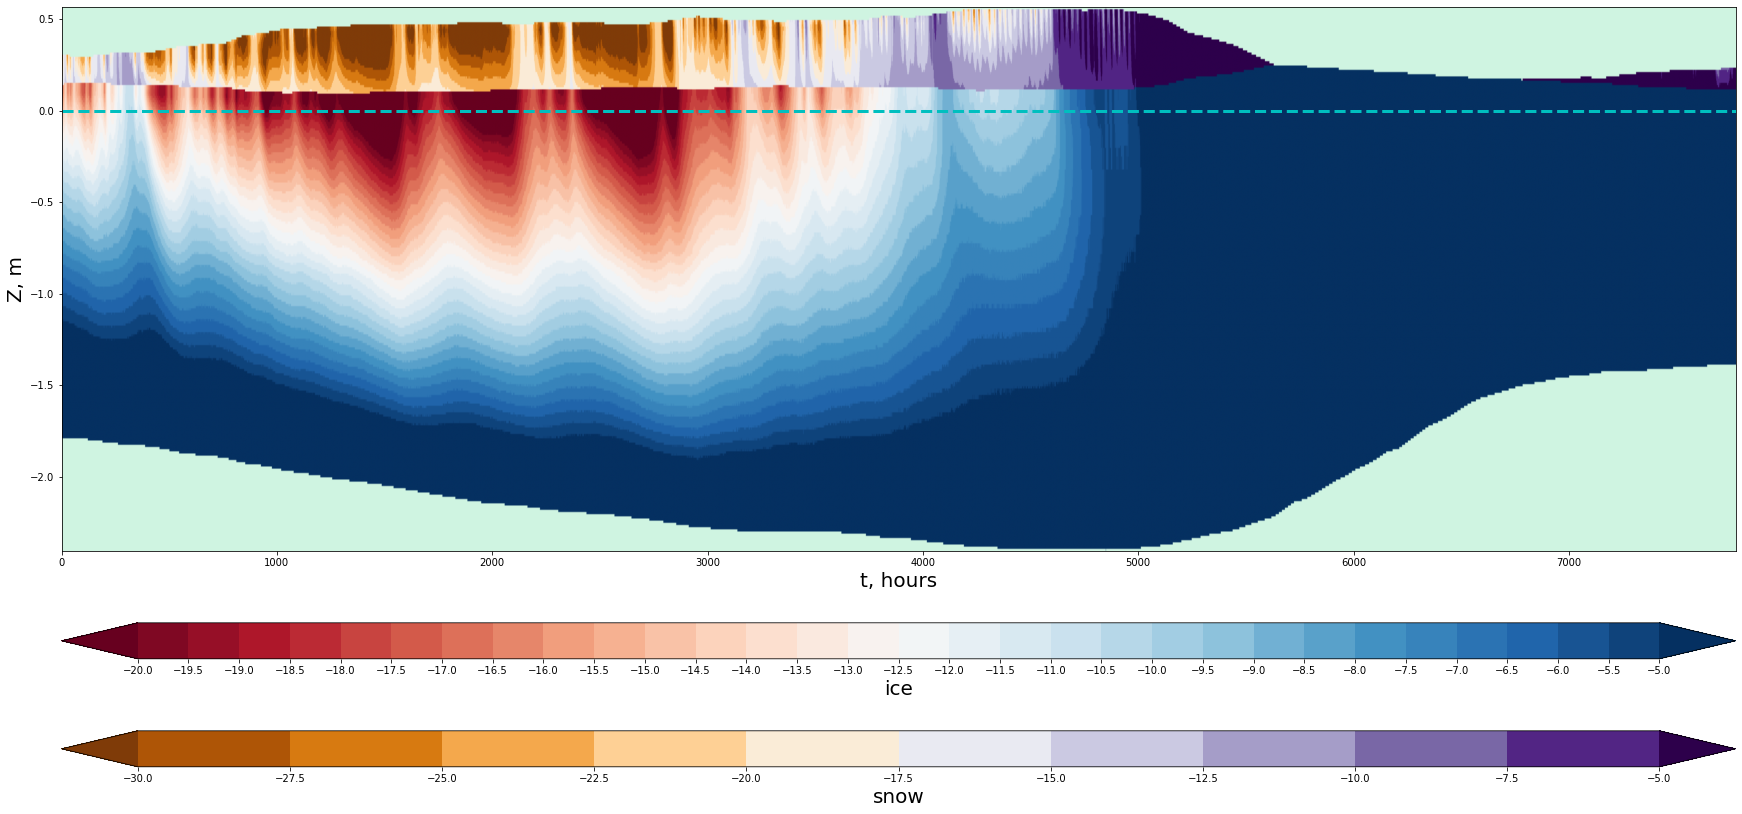

In [37]:
fig = plt.figure(figsize=(30, 10))
ax = plt.axes()
ax.imshow(img.swapaxes(0, 1), aspect='auto', origin='lower',
          extent=[process.timeline[0]/3600, process.timeline[-1]/3600, Z_mesh[0], Z_mesh[-1]])
ax.set_xlabel('t, hours', size=20)
ax.set_ylabel('Z, m', size=20)
ax.axhline(lw=3, ls='--', color='c')
# ax.xaxis.set_major_locator(mtk.LinearLocator(None))
# ax.yaxis.set_major_locator(mtk.LinearLocator(6))

cax_ice = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - 0.15,
                        ax.get_position().width, 0.05])
fig.colorbar(mcm.ScalarMappable(norm_ice, cmap_ice), cax=cax_ice,
             orientation='horizontal', ticks=bounds_ice)
cax_ice.set_xlabel('ice', size=20)

if process.snow_temp_history.any():
    cax_snow = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - 0.3,
                             ax.get_position().width, 0.05])
    fig.colorbar(mcm.ScalarMappable(norm_snow, cmap_snow), cax=cax_snow,
                 orientation='horizontal', ticks=bounds_snow)
    cax_snow.set_xlabel('snow', size=20)
    
plt.show()

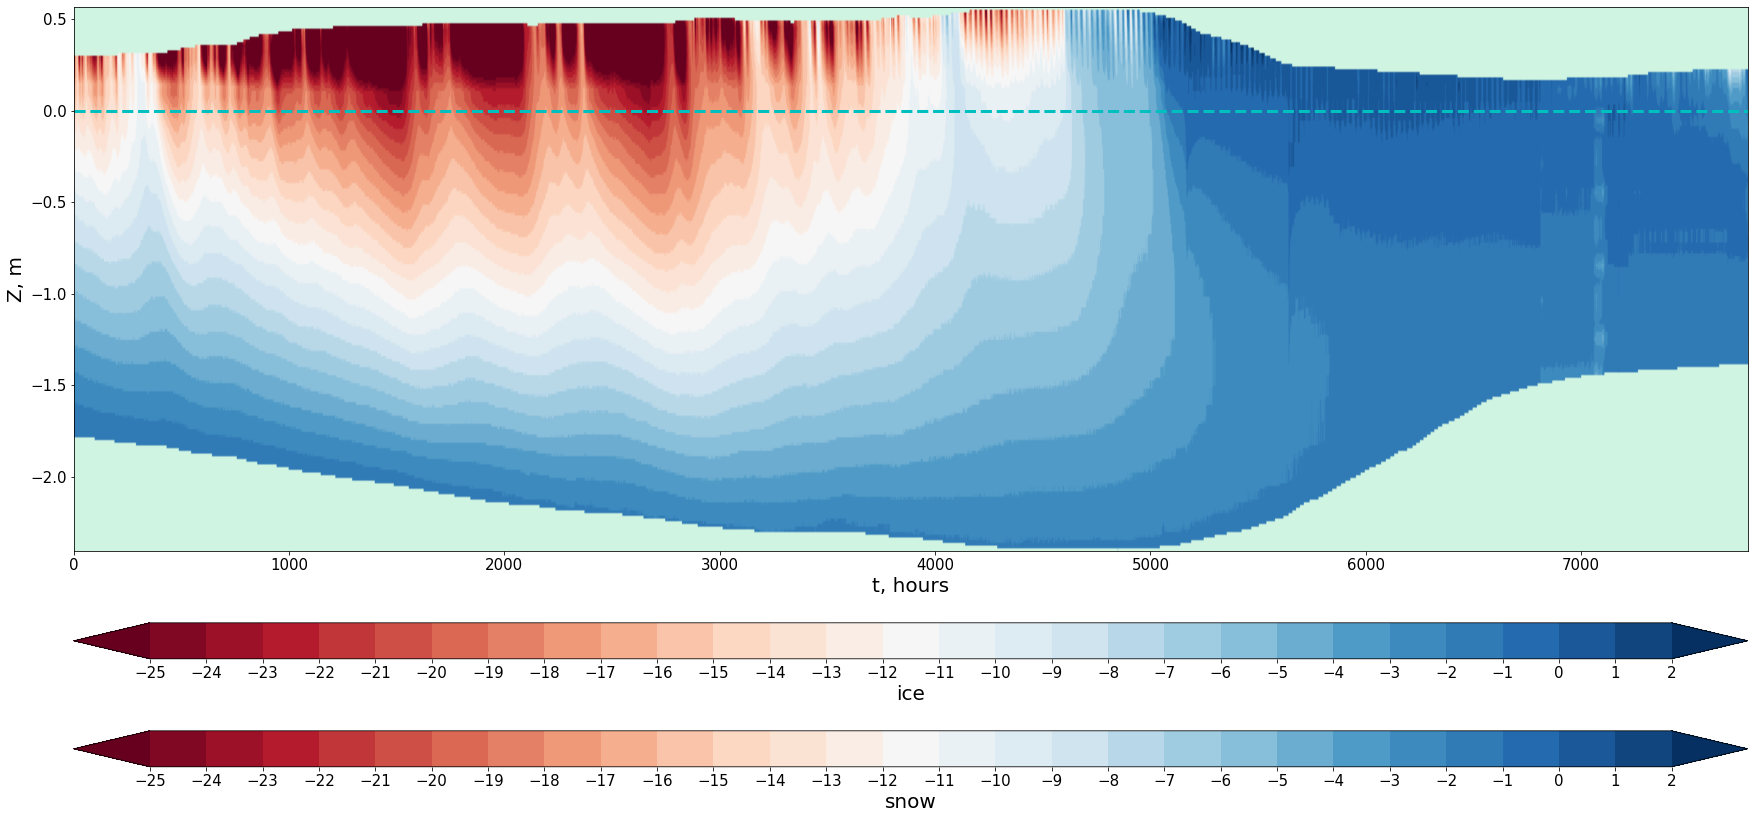

In [51]:
uv.timeseries_img(test_proc, y_points=200,
                  cmap_ice='RdBu', tmin_ice=-25, tmax_ice=2, prec_ice=1.0,
                  cmap_snow='RdBu', tmin_snow=-25, tmax_snow=2, prec_snow=1.0)

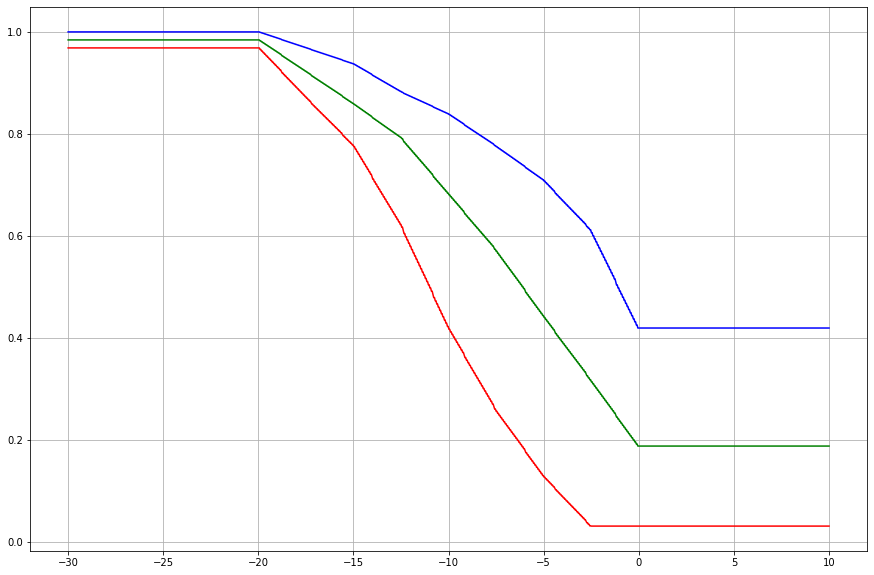

In [49]:
X = np.linspace(-30, 10, 1000)

plt.figure(figsize=(15, 10))
plt.plot(X, [cmap(norm(x))[0] for x in X], color='r')
plt.plot(X, [cmap(norm(x))[1] for x in X], color='g')
plt.plot(X, [cmap(norm(x))[2] for x in X], color='b')

plt.grid()
plt.show()